In [2]:
import numpy as np
import pandas as pd
import os
import requests
import json 
import time 
import matplotlib.pyplot as plt

In [3]:
# file_url = "tinder_data_tracking_data_TEMP_DATA_SAVE.txt"

In [4]:
# os.listdir(".")

In [5]:
# data_txt = open("tinder_data_tracking_data_TEMP_DATA_SAVE.txt").read()

In [6]:
## Trying to fetch the file from the net instead 

In [7]:
url = "http://sourisr.kapsi.fi/boras5/ip.txt"

In [8]:
data_txt = requests.get( url ).text

In [9]:
data_txt = data_txt.replace("__", "" )
data_txt = data_txt.replace("0_5", "0" )
data_txt = data_txt.replace("test", "0" )

In [10]:
# data_text

In [11]:
data_txt[ : 10 ]

'1536328189'

In [12]:
data_txt2 = data_txt.split(" ")
data_txt2[ :10 ]

['1536328189;93.106.250.108;/boras5/save_url_0_01.php?0;',
 '1536328189;93.106.250.108;/boras5/save_url_0_01.php?1;',
 '1536328189;93.106.250.108;/boras5/save_url_0_01.php?2;',
 '1536328310;93.106.250.108;/boras5/save_url_0_01.php?3;',
 '1536328312;93.106.250.108;/boras5/save_url_0_01.php?4;',
 '1536328903;93.106.250.108;/boras5/save_url_0_01.php?5;',
 '1536328906;93.106.250.108;/boras5/save_url_0_01.php?6;',
 '1536329471;2001:16b8:464a:f101:4cd:8148:8278:c24a;/boras5/save_url_0_01.php?0;',
 '1536329474;2001:16b8:464a:f101:4cd:8148:8278:c24a;/boras5/save_url_0_01.php?1;',
 '1536329479;2001:16b8:464a:f101:4cd:8148:8278:c24a;/boras5/save_url_0_01.php?2;']

In [13]:
data_txt3 = []

In [14]:
for line in data_txt2:
    data_txt3.append( line.split(";") )

In [15]:
data_txt3[ :10 ]

[['1536328189', '93.106.250.108', '/boras5/save_url_0_01.php?0', ''],
 ['1536328189', '93.106.250.108', '/boras5/save_url_0_01.php?1', ''],
 ['1536328189', '93.106.250.108', '/boras5/save_url_0_01.php?2', ''],
 ['1536328310', '93.106.250.108', '/boras5/save_url_0_01.php?3', ''],
 ['1536328312', '93.106.250.108', '/boras5/save_url_0_01.php?4', ''],
 ['1536328903', '93.106.250.108', '/boras5/save_url_0_01.php?5', ''],
 ['1536328906', '93.106.250.108', '/boras5/save_url_0_01.php?6', ''],
 ['1536329471',
  '2001:16b8:464a:f101:4cd:8148:8278:c24a',
  '/boras5/save_url_0_01.php?0',
  ''],
 ['1536329474',
  '2001:16b8:464a:f101:4cd:8148:8278:c24a',
  '/boras5/save_url_0_01.php?1',
  ''],
 ['1536329479',
  '2001:16b8:464a:f101:4cd:8148:8278:c24a',
  '/boras5/save_url_0_01.php?2',
  '']]

In [16]:
len( data_txt3 ) 

1501

In [17]:
data_txt3[0]

['1536328189', '93.106.250.108', '/boras5/save_url_0_01.php?0', '']

In [18]:
for line in data_txt3:
    # format data
    line[0] = int( line[0] ) 
    line[2] = line[2].split("?")[-1]
    line[3] = time.asctime( time.localtime( int( line[0] ) ) ) 
    line.append( "geoloc" )

In [19]:
data_txt3[ :10 ]

[[1536328189, '93.106.250.108', '0', 'Fri Sep  7 15:49:49 2018', 'geoloc'],
 [1536328189, '93.106.250.108', '1', 'Fri Sep  7 15:49:49 2018', 'geoloc'],
 [1536328189, '93.106.250.108', '2', 'Fri Sep  7 15:49:49 2018', 'geoloc'],
 [1536328310, '93.106.250.108', '3', 'Fri Sep  7 15:51:50 2018', 'geoloc'],
 [1536328312, '93.106.250.108', '4', 'Fri Sep  7 15:51:52 2018', 'geoloc'],
 [1536328903, '93.106.250.108', '5', 'Fri Sep  7 16:01:43 2018', 'geoloc'],
 [1536328906, '93.106.250.108', '6', 'Fri Sep  7 16:01:46 2018', 'geoloc'],
 [1536329471,
  '2001:16b8:464a:f101:4cd:8148:8278:c24a',
  '0',
  'Fri Sep  7 16:11:11 2018',
  'geoloc'],
 [1536329474,
  '2001:16b8:464a:f101:4cd:8148:8278:c24a',
  '1',
  'Fri Sep  7 16:11:14 2018',
  'geoloc'],
 [1536329479,
  '2001:16b8:464a:f101:4cd:8148:8278:c24a',
  '2',
  'Fri Sep  7 16:11:19 2018',
  'geoloc']]

In [20]:
for line in data_txt3:
    # fetch geolocation
    # delay
    time.sleep( 0.5 )
    url_string = "http://ip-api.com/json/"+line[1]
    print( "--Fetching url "+url_string )
    fetched_geoloc_of_ip__raw = requests.get( url_string ).text 
    # print("--- response : ")
    # print( fetched_geoloc_of_ip__raw )
    fetched_geoloc_of_ip = json.loads( fetched_geoloc_of_ip__raw )
    line[4] = fetched_geoloc_of_ip["city"]

--Fetching url http://ip-api.com/json/93.106.250.108
--- response : 
{"as":"AS1759 Telia Finland Oyj","city":"Helsinki","country":"Finland","countryCode":"FI","isp":"Telia Finland Oyj","lat":60.1975,"lon":24.875,"org":"Telia Finland Oyj","query":"93.106.250.108","region":"18","regionName":"Uusimaa","status":"success","timezone":"Europe/Helsinki","zip":"00330"}
--Fetching url http://ip-api.com/json/93.106.250.108
--- response : 
{"as":"AS1759 Telia Finland Oyj","city":"Helsinki","country":"Finland","countryCode":"FI","isp":"Telia Finland Oyj","lat":60.1975,"lon":24.875,"org":"Telia Finland Oyj","query":"93.106.250.108","region":"18","regionName":"Uusimaa","status":"success","timezone":"Europe/Helsinki","zip":"00330"}
--Fetching url http://ip-api.com/json/93.106.250.108
--- response : 
{"as":"AS1759 Telia Finland Oyj","city":"Helsinki","country":"Finland","countryCode":"FI","isp":"Telia Finland Oyj","lat":60.1975,"lon":24.875,"org":"Telia Finland Oyj","query":"93.106.250.108","region":"1

--Fetching url http://ip-api.com/json/77.238.61.100
--- response : 
{"as":"AS1653 SUNET SUNET Swedish University Network","city":"Borås","country":"Sweden","countryCode":"SE","isp":"SUNET/NORDUnet","lat":57.721,"lon":12.9401,"org":"Boras Studentbostader","query":"77.238.61.100","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"506 30"}
--Fetching url http://ip-api.com/json/77.238.61.100
--- response : 
{"as":"AS1653 SUNET SUNET Swedish University Network","city":"Borås","country":"Sweden","countryCode":"SE","isp":"SUNET/NORDUnet","lat":57.721,"lon":12.9401,"org":"Boras Studentbostader","query":"77.238.61.100","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"506 30"}
--Fetching url http://ip-api.com/json/77.238.61.100
--- response : 
{"as":"AS1653 SUNET SUNET Swedish University Network","city":"Borås","country":"Sweden","countryCode":"SE","isp":"SUNET/NORDUnet","lat":57.721,"lon":12.9401

--Fetching url http://ip-api.com/json/81.234.209.232
--- response : 
{"as":"AS3301 Telia Company AB","city":"Dalsjoefors","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":13.0833,"org":"TeliaSonera AB","query":"81.234.209.232","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"516 91"}
--Fetching url http://ip-api.com/json/81.234.209.232
--- response : 
{"as":"AS3301 Telia Company AB","city":"Dalsjoefors","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":13.0833,"org":"TeliaSonera AB","query":"81.234.209.232","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"516 91"}
--Fetching url http://ip-api.com/json/81.234.209.232
--- response : 
{"as":"AS3301 Telia Company AB","city":"Dalsjoefors","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":13.0833,"org":"TeliaSonera AB","query":"81.234.209.232","region"

--Fetching url http://ip-api.com/json/193.12.72.184
--- response : 
{"as":"AS1257 TELE2","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Tele2 SWIPnet","lat":57.721,"lon":12.9401,"org":"Tele2 SWIPnet","query":"193.12.72.184","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 51"}
--Fetching url http://ip-api.com/json/193.12.72.184
--- response : 
{"as":"AS1257 TELE2","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Tele2 SWIPnet","lat":57.721,"lon":12.9401,"org":"Tele2 SWIPnet","query":"193.12.72.184","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 51"}
--Fetching url http://ip-api.com/json/193.12.72.184
--- response : 
{"as":"AS1257 TELE2","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Tele2 SWIPnet","lat":57.721,"lon":12.9401,"org":"Tele2 SWIPnet","query":"193.12.72.184","region":"O","regionName":"Västra Götaland","status":"success","timezon

--Fetching url http://ip-api.com/json/78.71.214.199
--- response : 
{"as":"AS3301 Telia Company AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":12.9167,"org":"Telia Company","query":"78.71.214.199","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/78.71.214.199
--- response : 
{"as":"AS3301 Telia Company AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":12.9167,"org":"Telia Company","query":"78.71.214.199","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/78.71.214.199
--- response : 
{"as":"AS3301 Telia Company AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":12.9167,"org":"Telia Company","query":"78.71.214.199","region":"O","regionName":"Västra G

--Fetching url http://ip-api.com/json/85.194.8.68
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"85.194.8.68","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/85.194.8.68
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"85.194.8.68","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/85.194.8.68
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"85.194.8.68","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europ

--Fetching url http://ip-api.com/json/83.252.97.31
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.97.31","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.252.97.31
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.97.31","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.252.97.31
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.97.31","region":"O","regionName":"Västra Götaland","status":"success","timezone":

--Fetching url http://ip-api.com/json/83.252.97.31
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.97.31","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.252.97.31
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.97.31","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.252.97.31
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.97.31","region":"O","regionName":"Västra Götaland","status":"success","timezone":

--Fetching url http://ip-api.com/json/78.71.214.199
--- response : 
{"as":"AS3301 Telia Company AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":12.9167,"org":"Telia Company","query":"78.71.214.199","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/78.71.214.199
--- response : 
{"as":"AS3301 Telia Company AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":12.9167,"org":"Telia Company","query":"78.71.214.199","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/78.71.214.199
--- response : 
{"as":"AS3301 Telia Company AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":12.9167,"org":"Telia Company","query":"78.71.214.199","region":"O","regionName":"Västra G

--Fetching url http://ip-api.com/json/85.224.225.115
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Moelndal","country":"Sweden","countryCode":"SE","isp":"Bredbandsbolaget AB","lat":57.65,"lon":12.0167,"org":"Bredbandsbolaget AB","query":"85.224.225.115","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"431 00"}
--Fetching url http://ip-api.com/json/85.224.225.115
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Moelndal","country":"Sweden","countryCode":"SE","isp":"Bredbandsbolaget AB","lat":57.65,"lon":12.0167,"org":"Bredbandsbolaget AB","query":"85.224.225.115","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"431 00"}
--Fetching url http://ip-api.com/json/85.224.225.115
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Moelndal","country":"Sweden","countryCode":"SE","isp":"Bredbandsbolaget AB","lat":57.65,"lon":12.0167,"org":"Bredbandsbolaget AB","query":"85.224

--Fetching url http://ip-api.com/json/83.233.2.218
--- response : 
{"as":"AS29518 Bredband2 AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bredband2 AB","lat":57.7167,"lon":12.9167,"org":"Bredband2 AB","query":"83.233.2.218","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.233.2.218
--- response : 
{"as":"AS29518 Bredband2 AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bredband2 AB","lat":57.7167,"lon":12.9167,"org":"Bredband2 AB","query":"83.233.2.218","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.233.2.218
--- response : 
{"as":"AS29518 Bredband2 AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bredband2 AB","lat":57.7167,"lon":12.9167,"org":"Bredband2 AB","query":"83.233.2.218","region":"O","regionName":"Västra Götaland","status":"su

--Fetching url http://ip-api.com/json/94.234.50.247
--- response : 
{"as":"AS25169 Telenor Sverige AB","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Telenor Sverige AB","lat":57.7167,"lon":11.9667,"org":"Telenor Sverige AB","query":"94.234.50.247","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"409 15"}
--Fetching url http://ip-api.com/json/94.234.50.247
--- response : 
{"as":"AS25169 Telenor Sverige AB","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Telenor Sverige AB","lat":57.7167,"lon":11.9667,"org":"Telenor Sverige AB","query":"94.234.50.247","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"409 15"}
--Fetching url http://ip-api.com/json/94.234.50.247
--- response : 
{"as":"AS25169 Telenor Sverige AB","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Telenor Sverige AB","lat":57.7167,"lon":11.9667,"org":"Telenor Sverige AB","quer

--Fetching url http://ip-api.com/json/77.218.229.61
--- response : 
{"as":"AS1257 TELE2","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Tele2 Mobile","lat":57.7167,"lon":11.9667,"org":"Tele2 Mobile","query":"77.218.229.61","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"409 15"}
--Fetching url http://ip-api.com/json/2a04:ae0c:2804:6500:bd71:b73c:8f8c:d1bc
--- response : 
{"as":"AS39651 Com Hem AB","city":"Lund","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":55.7,"lon":13.1833,"org":"Com Hem AB","query":"2a04:ae0c:2804:6500:bd71:b73c:8f8c:d1bc","region":"M","regionName":"Skåne","status":"success","timezone":"Europe/Stockholm","zip":"220 02"}
--Fetching url http://ip-api.com/json/77.218.229.61
--- response : 
{"as":"AS1257 TELE2","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Tele2 Mobile","lat":57.7167,"lon":11.9667,"org":"Tele2 Mobile","query":"77.218.229.61","region":"O","regionName

--Fetching url http://ip-api.com/json/77.218.229.61
--- response : 
{"as":"AS1257 TELE2","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Tele2 Mobile","lat":57.7167,"lon":11.9667,"org":"Tele2 Mobile","query":"77.218.229.61","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"409 15"}
--Fetching url http://ip-api.com/json/77.218.229.61
--- response : 
{"as":"AS1257 TELE2","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Tele2 Mobile","lat":57.7167,"lon":11.9667,"org":"Tele2 Mobile","query":"77.218.229.61","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"409 15"}
--Fetching url http://ip-api.com/json/77.218.229.61
--- response : 
{"as":"AS1257 TELE2","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Tele2 Mobile","lat":57.7167,"lon":11.9667,"org":"Tele2 Mobile","query":"77.218.229.61","region":"O","regionName":"Västra Götaland","status":"succe

--Fetching url http://ip-api.com/json/77.238.61.107
--- response : 
{"as":"AS1653 SUNET SUNET Swedish University Network","city":"Borås","country":"Sweden","countryCode":"SE","isp":"SUNET/NORDUnet","lat":57.721,"lon":12.9401,"org":"Boras Studentbostader","query":"77.238.61.107","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"506 30"}
--Fetching url http://ip-api.com/json/77.238.61.107
--- response : 
{"as":"AS1653 SUNET SUNET Swedish University Network","city":"Borås","country":"Sweden","countryCode":"SE","isp":"SUNET/NORDUnet","lat":57.721,"lon":12.9401,"org":"Boras Studentbostader","query":"77.238.61.107","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"506 30"}
--Fetching url http://ip-api.com/json/77.238.61.107
--- response : 
{"as":"AS1653 SUNET SUNET Swedish University Network","city":"Borås","country":"Sweden","countryCode":"SE","isp":"SUNET/NORDUnet","lat":57.721,"lon":12.9401

--Fetching url http://ip-api.com/json/85.194.8.76
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"85.194.8.76","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/85.194.8.76
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"85.194.8.76","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/85.194.8.76
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"85.194.8.76","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europ

--Fetching url http://ip-api.com/json/31.208.112.166
--- response : 
{"as":"AS29518 Bredband2 AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bredband2 AB","lat":57.7167,"lon":12.9167,"org":"Splitvision","query":"31.208.112.166","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/31.208.115.5
--- response : 
{"as":"AS29518 Bredband2 AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bredband2 AB","lat":57.7167,"lon":12.9167,"org":"Splitvision","query":"31.208.115.5","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/31.208.112.166
--- response : 
{"as":"AS29518 Bredband2 AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bredband2 AB","lat":57.7167,"lon":12.9167,"org":"Splitvision","query":"31.208.112.166","region":"O","regionName":"Västra Götaland","status

--Fetching url http://ip-api.com/json/83.252.102.121
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.102.121","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.252.102.121
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.102.121","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.252.102.121
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.102.121","region":"O","regionName":"Västra Götaland","status":"success"

--Fetching url http://ip-api.com/json/83.252.101.19
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.101.19","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/31.208.114.169
--- response : 
{"as":"AS29518 Bredband2 AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bredband2 AB","lat":57.7167,"lon":12.9167,"org":"Splitvision","query":"31.208.114.169","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/31.208.114.169
--- response : 
{"as":"AS29518 Bredband2 AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bredband2 AB","lat":57.7167,"lon":12.9167,"org":"Splitvision","query":"31.208.114.169","region":"O","regionName":"Västra Götaland","status":"

--Fetching url http://ip-api.com/json/83.253.221.127
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.253.221.127","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.253.221.127
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.253.221.127","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.253.221.127
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.253.221.127","region":"O","regionName":"Västra Götaland","status":"success"

--Fetching url http://ip-api.com/json/83.253.221.127
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.253.221.127","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.253.221.127
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.253.221.127","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.253.221.127
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.253.221.127","region":"O","regionName":"Västra Götaland","status":"success"

--Fetching url http://ip-api.com/json/83.253.221.127
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.253.221.127","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.253.221.127
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.253.221.127","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.253.221.127
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.253.221.127","region":"O","regionName":"Västra Götaland","status":"success"

--Fetching url http://ip-api.com/json/217.214.151.114
--- response : 
{"as":"AS3301 Telia Company AB","city":"Selånger","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":62.4167,"lon":17.2598,"org":"Telia Mobile","query":"217.214.151.114","region":"","regionName":"Västernorrland","status":"success","timezone":"Europe/Stockholm","zip":""}
--Fetching url http://ip-api.com/json/217.214.151.114
--- response : 
{"as":"AS3301 Telia Company AB","city":"Selånger","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":62.4167,"lon":17.2598,"org":"Telia Mobile","query":"217.214.151.114","region":"","regionName":"Västernorrland","status":"success","timezone":"Europe/Stockholm","zip":""}
--Fetching url http://ip-api.com/json/217.214.151.114
--- response : 
{"as":"AS3301 Telia Company AB","city":"Selånger","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":62.4167,"lon":17.2598,"org":"Telia Mobile","query":"217.214.151.114","region":"","regionName":"Västern

--Fetching url http://ip-api.com/json/85.194.8.68
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"85.194.8.68","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/85.194.8.68
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"85.194.8.68","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/85.194.8.68
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"85.194.8.68","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europ

--Fetching url http://ip-api.com/json/185.229.190.165
--- response : 
{"as":"AS60068 Datacamp Limited","city":"Amsterdam","country":"Netherlands","countryCode":"NL","isp":"Overkill Alpha s.r.o.","lat":52.3556,"lon":4.9135,"org":"Overkill Alpha s.r.o.","query":"185.229.190.165","region":"NH","regionName":"North Holland","status":"success","timezone":"Europe/Amsterdam","zip":"1091"}
--Fetching url http://ip-api.com/json/37.123.150.170
--- response : 
{"as":"AS8473 Bahnhof AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bahnhof AB","lat":57.7167,"lon":12.9167,"org":"Bahnhof Internet AB","query":"37.123.150.170","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/37.123.150.170
--- response : 
{"as":"AS8473 Bahnhof AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bahnhof AB","lat":57.7167,"lon":12.9167,"org":"Bahnhof Internet AB","query":"37.123.150.170","region":"O

--Fetching url http://ip-api.com/json/217.214.146.177
--- response : 
{"as":"AS3301 Telia Company AB","city":"Selånger","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":62.4167,"lon":17.2598,"org":"Telia Mobile","query":"217.214.146.177","region":"","regionName":"Västernorrland","status":"success","timezone":"Europe/Stockholm","zip":""}
--Fetching url http://ip-api.com/json/217.214.146.177
--- response : 
{"as":"AS3301 Telia Company AB","city":"Selånger","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":62.4167,"lon":17.2598,"org":"Telia Mobile","query":"217.214.146.177","region":"","regionName":"Västernorrland","status":"success","timezone":"Europe/Stockholm","zip":""}
--Fetching url http://ip-api.com/json/217.214.146.177
--- response : 
{"as":"AS3301 Telia Company AB","city":"Selånger","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":62.4167,"lon":17.2598,"org":"Telia Mobile","query":"217.214.146.177","region":"","regionName":"Västern

--Fetching url http://ip-api.com/json/2a00:801:320:e9d9:a964:cd4e:45b3:db0c
--- response : 
{"as":"AS1257 TELE2","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Tele2 Mobile","lat":57.7167,"lon":11.9667,"org":"Tele2 Mobile","query":"2a00:801:320:e9d9:a964:cd4e:45b3:db0c","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"409 15"}
--Fetching url http://ip-api.com/json/2a00:801:320:e9d9:a964:cd4e:45b3:db0c
--- response : 
{"as":"AS1257 TELE2","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Tele2 Mobile","lat":57.7167,"lon":11.9667,"org":"Tele2 Mobile","query":"2a00:801:320:e9d9:a964:cd4e:45b3:db0c","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"409 15"}
--Fetching url http://ip-api.com/json/2a00:801:320:e9d9:a964:cd4e:45b3:db0c
--- response : 
{"as":"AS1257 TELE2","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Tele2 Mobile","lat":57.716

--Fetching url http://ip-api.com/json/87.253.95.220
--- response : 
{"as":"AS45011 A3 Sverige AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"A3 Sverige AB","lat":57.7167,"lon":12.9167,"org":"A3 Sverige AB","query":"87.253.95.220","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/87.253.95.220
--- response : 
{"as":"AS45011 A3 Sverige AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"A3 Sverige AB","lat":57.7167,"lon":12.9167,"org":"A3 Sverige AB","query":"87.253.95.220","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/87.253.95.220
--- response : 
{"as":"AS45011 A3 Sverige AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"A3 Sverige AB","lat":57.7167,"lon":12.9167,"org":"A3 Sverige AB","query":"87.253.95.220","region":"O","regionName":"Västra Götalan

--Fetching url http://ip-api.com/json/2a00:801:251:c32e:b943:3a12:3d40:3813
--- response : 
{"as":"AS1257 TELE2","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Tele2 Mobile","lat":57.7167,"lon":11.9667,"org":"Tele2 Mobile","query":"2a00:801:251:c32e:b943:3a12:3d40:3813","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"409 15"}
--Fetching url http://ip-api.com/json/85.194.8.59
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"85.194.8.59","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/2a00:801:251:c32e:b943:3a12:3d40:3813
--- response : 
{"as":"AS1257 TELE2","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Tele2 Mobile","lat":57.7167,"lon":11.9667,"org":"Tele2 Mobile","query":"2a00:801:

--Fetching url http://ip-api.com/json/31.208.113.223
--- response : 
{"as":"AS29518 Bredband2 AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bredband2 AB","lat":57.7167,"lon":12.9167,"org":"Splitvision","query":"31.208.113.223","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/31.208.113.223
--- response : 
{"as":"AS29518 Bredband2 AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bredband2 AB","lat":57.7167,"lon":12.9167,"org":"Splitvision","query":"31.208.113.223","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/2a00:801:320:7a3f:73ca:9771:84ee:a29c
--- response : 
{"as":"AS1257 TELE2","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Tele2 Mobile","lat":57.7167,"lon":11.9667,"org":"Tele2 Mobile","query":"2a00:801:320:7a3f:73ca:9771:84ee:a29c","re

--Fetching url http://ip-api.com/json/85.230.216.149
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bredbandsbolaget AB","lat":57.7167,"lon":12.9167,"org":"Bredbandsbolaget AB","query":"85.230.216.149","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/85.230.216.149
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bredbandsbolaget AB","lat":57.7167,"lon":12.9167,"org":"Bredbandsbolaget AB","query":"85.230.216.149","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.252.97.31
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.97.31","region":"O","region

--Fetching url http://ip-api.com/json/87.253.92.147
--- response : 
{"as":"AS45011 A3 Sverige AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"A3 Sverige AB","lat":57.7167,"lon":12.9167,"org":"A3 Sverige AB","query":"87.253.92.147","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/46.59.34.121
--- response : 
{"as":"AS8473 Bahnhof AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bahnhof AB","lat":57.7167,"lon":12.9167,"org":"Bahnhof AB","query":"46.59.34.121","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/46.59.34.121
--- response : 
{"as":"AS8473 Bahnhof AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bahnhof AB","lat":57.7167,"lon":12.9167,"org":"Bahnhof AB","query":"46.59.34.121","region":"O","regionName":"Västra Götaland","status":"success","t

--Fetching url http://ip-api.com/json/46.59.34.121
--- response : 
{"as":"AS8473 Bahnhof AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bahnhof AB","lat":57.7167,"lon":12.9167,"org":"Bahnhof AB","query":"46.59.34.121","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/95.199.11.76
--- response : 
{"as":"AS3301 Telia Company AB","city":"Stockholm","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":59.3333,"lon":18.05,"org":"TeliaSonera AB","query":"95.199.11.76","region":"AB","regionName":"Stockholm","status":"success","timezone":"Europe/Stockholm","zip":"173 11"}
--Fetching url http://ip-api.com/json/95.199.11.76
--- response : 
{"as":"AS3301 Telia Company AB","city":"Stockholm","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":59.3333,"lon":18.05,"org":"TeliaSonera AB","query":"95.199.11.76","region":"AB","regionName":"Stockholm","status":"suc

--Fetching url http://ip-api.com/json/2a00:801:341:f2af:2c58:df7e:10de:9934
--- response : 
{"as":"AS1257 TELE2","city":"Moelndal","country":"Sweden","countryCode":"SE","isp":"Tele2 Mobile","lat":57.65,"lon":12.0167,"org":"Tele2 Mobile","query":"2a00:801:341:f2af:2c58:df7e:10de:9934","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"431 00"}
--Fetching url http://ip-api.com/json/2a00:801:341:f2af:2c58:df7e:10de:9934
--- response : 
{"as":"AS1257 TELE2","city":"Moelndal","country":"Sweden","countryCode":"SE","isp":"Tele2 Mobile","lat":57.65,"lon":12.0167,"org":"Tele2 Mobile","query":"2a00:801:341:f2af:2c58:df7e:10de:9934","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"431 00"}
--Fetching url http://ip-api.com/json/2a00:801:341:f2af:2c58:df7e:10de:9934
--- response : 
{"as":"AS1257 TELE2","city":"Moelndal","country":"Sweden","countryCode":"SE","isp":"Tele2 Mobile","lat":57.65,"lon":12.0

--Fetching url http://ip-api.com/json/84.217.235.153
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Alingsas","country":"Sweden","countryCode":"SE","isp":"Telenor AB","lat":57.9333,"lon":12.5167,"org":"Telenor AB","query":"84.217.235.153","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"441 00"}
--Fetching url http://ip-api.com/json/84.217.235.153
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Alingsas","country":"Sweden","countryCode":"SE","isp":"Telenor AB","lat":57.9333,"lon":12.5167,"org":"Telenor AB","query":"84.217.235.153","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"441 00"}
--Fetching url http://ip-api.com/json/84.217.235.153
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Alingsas","country":"Sweden","countryCode":"SE","isp":"Telenor AB","lat":57.9333,"lon":12.5167,"org":"Telenor AB","query":"84.217.235.153","region":"O","regionName":"Västra Göta

--Fetching url http://ip-api.com/json/2a02:aa1:1607:e6e4:1:2:8b20:a881
--- response : 
{"as":"AS44034 Hi3G Access AB","city":"Stockholm (Stadshagen)","country":"Sweden","countryCode":"SE","isp":"Hi3G Access AB","lat":59.3347,"lon":18.0147,"org":"Hi3G Access AB","query":"2a02:aa1:1607:e6e4:1:2:8b20:a881","region":"","regionName":"Stockholm","status":"success","timezone":"Europe/Stockholm","zip":"104 25"}
--Fetching url http://ip-api.com/json/2a02:aa1:1607:e6e4:1:2:8b20:a881
--- response : 
{"as":"AS44034 Hi3G Access AB","city":"Stockholm (Stadshagen)","country":"Sweden","countryCode":"SE","isp":"Hi3G Access AB","lat":59.3347,"lon":18.0147,"org":"Hi3G Access AB","query":"2a02:aa1:1607:e6e4:1:2:8b20:a881","region":"","regionName":"Stockholm","status":"success","timezone":"Europe/Stockholm","zip":"104 25"}
--Fetching url http://ip-api.com/json/2a02:aa1:1607:e6e4:1:2:8b20:a881
--- response : 
{"as":"AS44034 Hi3G Access AB","city":"Stockholm (Stadshagen)","country":"Sweden","countryCode":"SE

--Fetching url http://ip-api.com/json/81.230.148.174
--- response : 
{"as":"AS3301 Telia Company AB","city":"Tostared","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.4167,"lon":12.5167,"org":"TeliaSonera AB","query":"81.230.148.174","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"519 94"}
--Fetching url http://ip-api.com/json/81.230.148.174
--- response : 
{"as":"AS3301 Telia Company AB","city":"Tostared","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.4167,"lon":12.5167,"org":"TeliaSonera AB","query":"81.230.148.174","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"519 94"}
--Fetching url http://ip-api.com/json/81.230.148.174
--- response : 
{"as":"AS3301 Telia Company AB","city":"Tostared","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.4167,"lon":12.5167,"org":"TeliaSonera AB","query":"81.230.148.174","region":"O","reg

--Fetching url http://ip-api.com/json/87.253.93.192
--- response : 
{"as":"AS45011 A3 Sverige AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"A3 Sverige AB","lat":57.7167,"lon":12.9167,"org":"A3 Sverige AB","query":"87.253.93.192","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/87.253.93.192
--- response : 
{"as":"AS45011 A3 Sverige AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"A3 Sverige AB","lat":57.7167,"lon":12.9167,"org":"A3 Sverige AB","query":"87.253.93.192","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/87.253.93.192
--- response : 
{"as":"AS45011 A3 Sverige AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"A3 Sverige AB","lat":57.7167,"lon":12.9167,"org":"A3 Sverige AB","query":"87.253.93.192","region":"O","regionName":"Västra Götalan

--Fetching url http://ip-api.com/json/81.235.23.87
--- response : 
{"as":"AS3301 Telia Company AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":12.9167,"org":"Telia Wholesale","query":"81.235.23.87","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/81.235.23.87
--- response : 
{"as":"AS3301 Telia Company AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":12.9167,"org":"Telia Wholesale","query":"81.235.23.87","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/81.235.23.87
--- response : 
{"as":"AS3301 Telia Company AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":12.9167,"org":"Telia Wholesale","query":"81.235.23.87","region":"O","regionName":"Västra G

--Fetching url http://ip-api.com/json/81.235.23.87
--- response : 
{"as":"AS3301 Telia Company AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":12.9167,"org":"Telia Wholesale","query":"81.235.23.87","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.252.98.209
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.98.209","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/81.235.23.87
--- response : 
{"as":"AS3301 Telia Company AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":12.9167,"org":"Telia Wholesale","query":"81.235.23.87","region":"O","regionName":"Västra Götaland","s

--Fetching url http://ip-api.com/json/94.234.54.39
--- response : 
{"as":"AS25169 Telenor Sverige AB","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Telenor Sverige AB","lat":57.7167,"lon":11.9667,"org":"Telenor Sverige AB","query":"94.234.54.39","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"409 15"}
--Fetching url http://ip-api.com/json/94.234.54.39
--- response : 
{"as":"AS25169 Telenor Sverige AB","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Telenor Sverige AB","lat":57.7167,"lon":11.9667,"org":"Telenor Sverige AB","query":"94.234.54.39","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"409 15"}
--Fetching url http://ip-api.com/json/2.70.225.183
--- response : 
{"as":"AS44034 Hi3G Access AB","city":"Stockholm (Stadshagen)","country":"Sweden","countryCode":"SE","isp":"Hi3G Access AB","lat":59.3347,"lon":18.0147,"org":"Hi3G Access AB","query":"2

--Fetching url http://ip-api.com/json/185.113.96.191
--- response : 
{"as":"AS29518 Bredband2 AB","city":"Sollentuna","country":"Sweden","countryCode":"SE","isp":"Bredband2 AB","lat":59.4391,"lon":17.9415,"org":"Bredband2 AB","query":"185.113.96.191","region":"AB","regionName":"Stockholm","status":"success","timezone":"Europe/Stockholm","zip":"191 00"}
--Fetching url http://ip-api.com/json/185.113.96.191
--- response : 
{"as":"AS29518 Bredband2 AB","city":"Sollentuna","country":"Sweden","countryCode":"SE","isp":"Bredband2 AB","lat":59.4391,"lon":17.9415,"org":"Bredband2 AB","query":"185.113.96.191","region":"AB","regionName":"Stockholm","status":"success","timezone":"Europe/Stockholm","zip":"191 00"}
--Fetching url http://ip-api.com/json/185.113.96.191
--- response : 
{"as":"AS29518 Bredband2 AB","city":"Sollentuna","country":"Sweden","countryCode":"SE","isp":"Bredband2 AB","lat":59.4391,"lon":17.9415,"org":"Bredband2 AB","query":"185.113.96.191","region":"AB","regionName":"Stockholm",

--Fetching url http://ip-api.com/json/94.234.49.114
--- response : 
{"as":"AS25169 Telenor Sverige AB","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Telenor Sverige AB","lat":57.7167,"lon":11.9667,"org":"Telenor Sverige AB","query":"94.234.49.114","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"409 15"}
--Fetching url http://ip-api.com/json/94.234.49.114
--- response : 
{"as":"AS25169 Telenor Sverige AB","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Telenor Sverige AB","lat":57.7167,"lon":11.9667,"org":"Telenor Sverige AB","query":"94.234.49.114","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"409 15"}
--Fetching url http://ip-api.com/json/94.234.49.114
--- response : 
{"as":"AS25169 Telenor Sverige AB","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Telenor Sverige AB","lat":57.7167,"lon":11.9667,"org":"Telenor Sverige AB","quer

--Fetching url http://ip-api.com/json/79.99.170.162
--- response : 
{"as":"AS44769 Karlsborgs Energi","city":"Hjo","country":"Sweden","countryCode":"SE","isp":"Karlsborgs Energi","lat":58.3013,"lon":14.2878,"org":"Karlsborgs Energi","query":"79.99.170.162","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"544 30"}
--Fetching url http://ip-api.com/json/79.99.170.162
--- response : 
{"as":"AS44769 Karlsborgs Energi","city":"Hjo","country":"Sweden","countryCode":"SE","isp":"Karlsborgs Energi","lat":58.3013,"lon":14.2878,"org":"Karlsborgs Energi","query":"79.99.170.162","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"544 30"}
--Fetching url http://ip-api.com/json/79.99.170.162
--- response : 
{"as":"AS44769 Karlsborgs Energi","city":"Hjo","country":"Sweden","countryCode":"SE","isp":"Karlsborgs Energi","lat":58.3013,"lon":14.2878,"org":"Karlsborgs Energi","query":"79.99.170.162","region":"O

--Fetching url http://ip-api.com/json/87.253.92.147
--- response : 
{"as":"AS45011 A3 Sverige AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"A3 Sverige AB","lat":57.7167,"lon":12.9167,"org":"A3 Sverige AB","query":"87.253.92.147","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/87.253.92.147
--- response : 
{"as":"AS45011 A3 Sverige AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"A3 Sverige AB","lat":57.7167,"lon":12.9167,"org":"A3 Sverige AB","query":"87.253.92.147","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/87.253.92.147
--- response : 
{"as":"AS45011 A3 Sverige AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"A3 Sverige AB","lat":57.7167,"lon":12.9167,"org":"A3 Sverige AB","query":"87.253.92.147","region":"O","regionName":"Västra Götalan

--Fetching url http://ip-api.com/json/81.225.48.238
--- response : 
{"as":"AS3301 Telia Company AB","city":"Kristianstad","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":56.0333,"lon":14.1333,"org":"Telia Wholesale","query":"81.225.48.238","region":"M","regionName":"Skåne","status":"success","timezone":"Europe/Stockholm","zip":"291 00"}
--Fetching url http://ip-api.com/json/81.229.200.10
--- response : 
{"as":"AS3301 Telia Company AB","city":"Ulricehamn","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7833,"lon":13.4167,"org":"TeliaSonera AB","query":"81.229.200.10","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"523 01"}
--Fetching url http://ip-api.com/json/94.234.54.98
--- response : 
{"as":"AS25169 Telenor Sverige AB","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Telenor Sverige AB","lat":57.7167,"lon":11.9667,"org":"Telenor Sverige AB","query":"94.234.54.98","region":"O","

--Fetching url http://ip-api.com/json/94.234.54.98
--- response : 
{"as":"AS25169 Telenor Sverige AB","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Telenor Sverige AB","lat":57.7167,"lon":11.9667,"org":"Telenor Sverige AB","query":"94.234.54.98","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"409 15"}
--Fetching url http://ip-api.com/json/94.234.54.98
--- response : 
{"as":"AS25169 Telenor Sverige AB","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Telenor Sverige AB","lat":57.7167,"lon":11.9667,"org":"Telenor Sverige AB","query":"94.234.54.98","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"409 15"}
--Fetching url http://ip-api.com/json/2a02:aa1:1003:a2ef:50ce:85bb:dfd2:9507
--- response : 
{"as":"AS44034 Hi3G Access AB","city":"Stockholm","country":"Sweden","countryCode":"SE","isp":"Hi3G Access AB","lat":59.3333,"lon":18.05,"org":"Hi3G Access AB"

--Fetching url http://ip-api.com/json/90.224.8.37
--- response : 
{"as":"AS3301 Telia Company AB","city":"Sparsor","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.8,"lon":13,"org":"Telia Company","query":"90.224.8.37","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"513 50"}
--Fetching url http://ip-api.com/json/90.224.8.37
--- response : 
{"as":"AS3301 Telia Company AB","city":"Sparsor","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.8,"lon":13,"org":"Telia Company","query":"90.224.8.37","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"513 50"}
--Fetching url http://ip-api.com/json/90.224.8.37
--- response : 
{"as":"AS3301 Telia Company AB","city":"Sparsor","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.8,"lon":13,"org":"Telia Company","query":"90.224.8.37","region":"O","regionName":"Västra Götaland","status":"success","t

--Fetching url http://ip-api.com/json/78.71.202.184
--- response : 
{"as":"AS3301 Telia Company AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":12.9167,"org":"Telia Company","query":"78.71.202.184","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/78.71.202.184
--- response : 
{"as":"AS3301 Telia Company AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":12.9167,"org":"Telia Company","query":"78.71.202.184","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/78.71.209.114
--- response : 
{"as":"AS3301 Telia Company AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":12.9167,"org":"Telia Company","query":"78.71.209.114","region":"O","regionName":"Västra G

--Fetching url http://ip-api.com/json/83.252.8.174
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.8.174","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.252.8.174
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.8.174","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.252.8.174
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.8.174","region":"O","regionName":"Västra Götaland","status":"success","timezone":

--Fetching url http://ip-api.com/json/90.227.24.95
--- response : 
{"as":"AS3301 Telia Company AB","city":"Trollhättan","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":58.2667,"lon":12.3,"org":"Telia Company","query":"90.227.24.95","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"461 22"}
--Fetching url http://ip-api.com/json/90.227.24.95
--- response : 
{"as":"AS3301 Telia Company AB","city":"Trollhättan","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":58.2667,"lon":12.3,"org":"Telia Company","query":"90.227.24.95","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"461 22"}
--Fetching url http://ip-api.com/json/90.227.24.95
--- response : 
{"as":"AS3301 Telia Company AB","city":"Trollhättan","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":58.2667,"lon":12.3,"org":"Telia Company","query":"90.227.24.95","region":"O","regionName":"Västr

--Fetching url http://ip-api.com/json/90.226.43.244
--- response : 
{"as":"AS3301 Telia Company AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":57.7167,"lon":12.9167,"org":"Telia Company","query":"90.226.43.244","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.252.97.196
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.97.196","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/83.252.97.196
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.97.196","region":"O","regionName":"Västra Götaland","status":"suc

--Fetching url http://ip-api.com/json/213.238.253.221
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Ownit Broadband","lat":57.7167,"lon":12.9167,"org":"Ownit Broadband","query":"213.238.253.221","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/213.238.253.221
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Ownit Broadband","lat":57.7167,"lon":12.9167,"org":"Ownit Broadband","query":"213.238.253.221","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/213.238.253.221
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Ownit Broadband","lat":57.7167,"lon":12.9167,"org":"Ownit Broadband","query":"213.238.253.221","region":"O

--Fetching url http://ip-api.com/json/213.238.250.16
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Ownit Broadband","lat":57.7167,"lon":12.9167,"org":"Ownit Broadband","query":"213.238.250.16","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/213.238.250.16
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Ownit Broadband","lat":57.7167,"lon":12.9167,"org":"Ownit Broadband","query":"213.238.250.16","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/213.238.250.16
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Ownit Broadband","lat":57.7167,"lon":12.9167,"org":"Ownit Broadband","query":"213.238.250.16","region":"O","reg

--Fetching url http://ip-api.com/json/155.4.250.131
--- response : 
{"as":"AS8473 Bahnhof AB","city":"Alingsas","country":"Sweden","countryCode":"SE","isp":"Bahnhof AB","lat":57.9333,"lon":12.5167,"org":"Bahnhof AB","query":"155.4.250.131","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"441 00"}
--Fetching url http://ip-api.com/json/85.224.141.47
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Alingsas","country":"Sweden","countryCode":"SE","isp":"Bredbandsbolaget AB","lat":57.9333,"lon":12.5167,"org":"Bredbandsbolaget AB","query":"85.224.141.47","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"441 00"}
--Fetching url http://ip-api.com/json/85.224.141.47
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Alingsas","country":"Sweden","countryCode":"SE","isp":"Bredbandsbolaget AB","lat":57.9333,"lon":12.5167,"org":"Bredbandsbolaget AB","query":"85.224.141.47","region":"O","

--Fetching url http://ip-api.com/json/158.174.58.225
--- response : 
{"as":"AS8473 Bahnhof AB","city":"Ulricehamn","country":"Sweden","countryCode":"SE","isp":"Bahnhof AB","lat":57.7916,"lon":13.4142,"org":"Bahnhof AB","query":"158.174.58.225","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"523 32"}
--Fetching url http://ip-api.com/json/158.174.58.225
--- response : 
{"as":"AS8473 Bahnhof AB","city":"Ulricehamn","country":"Sweden","countryCode":"SE","isp":"Bahnhof AB","lat":57.7916,"lon":13.4142,"org":"Bahnhof AB","query":"158.174.58.225","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"523 32"}
--Fetching url http://ip-api.com/json/158.174.58.225
--- response : 
{"as":"AS8473 Bahnhof AB","city":"Ulricehamn","country":"Sweden","countryCode":"SE","isp":"Bahnhof AB","lat":57.7916,"lon":13.4142,"org":"Bahnhof AB","query":"158.174.58.225","region":"O","regionName":"Västra Götaland","statu

--Fetching url http://ip-api.com/json/81.226.17.68
--- response : 
{"as":"AS3301 Telia Company AB","city":"Malmo","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":55.6,"lon":13,"org":"TeliaSonera AB","query":"81.226.17.68","region":"M","regionName":"Skåne","status":"success","timezone":"Europe/Stockholm","zip":"205 42"}
--Fetching url http://ip-api.com/json/81.226.17.68
--- response : 
{"as":"AS3301 Telia Company AB","city":"Malmo","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":55.6,"lon":13,"org":"TeliaSonera AB","query":"81.226.17.68","region":"M","regionName":"Skåne","status":"success","timezone":"Europe/Stockholm","zip":"205 42"}
--Fetching url http://ip-api.com/json/81.226.17.68
--- response : 
{"as":"AS3301 Telia Company AB","city":"Malmo","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":55.6,"lon":13,"org":"TeliaSonera AB","query":"81.226.17.68","region":"M","regionName":"Skåne","status":"success","timezone":"Europe/Stockholm"

--Fetching url http://ip-api.com/json/46.230.211.208
--- response : 
{"as":"AS1299 Telia Company AB","city":"Stockholm","country":"Sweden","countryCode":"SE","isp":"Netett Sverige AB","lat":59.3316,"lon":18.0678,"org":"Net1 Sverige AB","query":"46.230.211.208","region":"AB","regionName":"Stockholm","status":"success","timezone":"Europe/Stockholm","zip":"100 05"}
--Fetching url http://ip-api.com/json/46.230.211.208
--- response : 
{"as":"AS1299 Telia Company AB","city":"Stockholm","country":"Sweden","countryCode":"SE","isp":"Netett Sverige AB","lat":59.3316,"lon":18.0678,"org":"Net1 Sverige AB","query":"46.230.211.208","region":"AB","regionName":"Stockholm","status":"success","timezone":"Europe/Stockholm","zip":"100 05"}
--Fetching url http://ip-api.com/json/46.230.211.208
--- response : 
{"as":"AS1299 Telia Company AB","city":"Stockholm","country":"Sweden","countryCode":"SE","isp":"Netett Sverige AB","lat":59.3316,"lon":18.0678,"org":"Net1 Sverige AB","query":"46.230.211.208","region":

--Fetching url http://ip-api.com/json/178.24.236.71
--- response : 
{"as":"AS31334 Vodafone Kabel Deutschland GmbH","city":"Arnstadt","country":"Germany","countryCode":"DE","isp":"Vodafone Kabel Deutschland","lat":50.8405,"lon":10.952,"org":"Vodafone Kabel Deutschland","query":"178.24.236.71","region":"TH","regionName":"Thuringia","status":"success","timezone":"Europe/Berlin","zip":"99310"}
--Fetching url http://ip-api.com/json/178.24.236.71
--- response : 
{"as":"AS31334 Vodafone Kabel Deutschland GmbH","city":"Arnstadt","country":"Germany","countryCode":"DE","isp":"Vodafone Kabel Deutschland","lat":50.8405,"lon":10.952,"org":"Vodafone Kabel Deutschland","query":"178.24.236.71","region":"TH","regionName":"Thuringia","status":"success","timezone":"Europe/Berlin","zip":"99310"}
--Fetching url http://ip-api.com/json/178.24.236.71
--- response : 
{"as":"AS31334 Vodafone Kabel Deutschland GmbH","city":"Arnstadt","country":"Germany","countryCode":"DE","isp":"Vodafone Kabel Deutschland","lat

--Fetching url http://ip-api.com/json/91.202.159.98
--- response : 
{"as":"AS44746 Satellithuset i Limmared AB","city":"Limmared","country":"Sweden","countryCode":"SE","isp":"Satellithuset i Limmared AB","lat":57.5333,"lon":13.35,"org":"Satellithuset i Limmared AB","query":"91.202.159.98","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"514 41"}
--Fetching url http://ip-api.com/json/91.202.159.98
--- response : 
{"as":"AS44746 Satellithuset i Limmared AB","city":"Limmared","country":"Sweden","countryCode":"SE","isp":"Satellithuset i Limmared AB","lat":57.5333,"lon":13.35,"org":"Satellithuset i Limmared AB","query":"91.202.159.98","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"514 41"}
--Fetching url http://ip-api.com/json/91.202.159.98
--- response : 
{"as":"AS44746 Satellithuset i Limmared AB","city":"Limmared","country":"Sweden","countryCode":"SE","isp":"Satellithuset i Limmared AB

--Fetching url http://ip-api.com/json/85.224.140.17
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Alingsas","country":"Sweden","countryCode":"SE","isp":"Bredbandsbolaget AB","lat":57.9333,"lon":12.5167,"org":"Bredbandsbolaget AB","query":"85.224.140.17","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"441 00"}
--Fetching url http://ip-api.com/json/85.224.140.17
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Alingsas","country":"Sweden","countryCode":"SE","isp":"Bredbandsbolaget AB","lat":57.9333,"lon":12.5167,"org":"Bredbandsbolaget AB","query":"85.224.140.17","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"441 00"}
--Fetching url http://ip-api.com/json/85.224.140.17
--- response : 
{"as":"AS2119 Telenor Norge AS","city":"Alingsas","country":"Sweden","countryCode":"SE","isp":"Bredbandsbolaget AB","lat":57.9333,"lon":12.5167,"org":"Bredbandsbolaget AB","query":"85.22

--Fetching url http://ip-api.com/json/83.252.96.169
--- response : 
{"as":"AS39651 Com Hem AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Com Hem AB","lat":57.7167,"lon":12.9167,"org":"Com Hem AB","query":"83.252.96.169","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/2a00:801:300:91fc:2ca6:963d:37b6:99d0
--- response : 
{"as":"AS1257 TELE2","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Tele2 Mobile","lat":57.7167,"lon":11.9667,"org":"Tele2 Mobile","query":"2a00:801:300:91fc:2ca6:963d:37b6:99d0","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"409 15"}
--Fetching url http://ip-api.com/json/2a00:801:300:91fc:2ca6:963d:37b6:99d0
--- response : 
{"as":"AS1257 TELE2","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Tele2 Mobile","lat":57.7167,"lon":11.9667,"org":"Tele2 Mobile","query":"2a00:

--Fetching url http://ip-api.com/json/158.174.106.81
--- response : 
{"as":"AS8473 Bahnhof AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bahnhof AB","lat":57.7167,"lon":12.9167,"org":"Bahnhof AB","query":"158.174.106.81","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/158.174.106.81
--- response : 
{"as":"AS8473 Bahnhof AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bahnhof AB","lat":57.7167,"lon":12.9167,"org":"Bahnhof AB","query":"158.174.106.81","region":"O","regionName":"Västra Götaland","status":"success","timezone":"Europe/Stockholm","zip":"504 54"}
--Fetching url http://ip-api.com/json/158.174.106.81
--- response : 
{"as":"AS8473 Bahnhof AB","city":"Borås","country":"Sweden","countryCode":"SE","isp":"Bahnhof AB","lat":57.7167,"lon":12.9167,"org":"Bahnhof AB","query":"158.174.106.81","region":"O","regionName":"Västra Götaland","status":"success","t

--Fetching url http://ip-api.com/json/2001:2002:4e47:d712:959c:cf23:2f11:ae45
--- response : 
{"as":"AS3301 Telia Company AB","city":"Solna (Råsunda)","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":59.3625,"lon":17.9989,"org":"Telia Company","query":"2001:2002:4e47:d712:959c:cf23:2f11:ae45","region":"","regionName":"Stockholm","status":"success","timezone":"Europe/Stockholm","zip":"105 04"}
--Fetching url http://ip-api.com/json/2001:2002:4e47:d712:959c:cf23:2f11:ae45
--- response : 
{"as":"AS3301 Telia Company AB","city":"Solna (Råsunda)","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":59.3625,"lon":17.9989,"org":"Telia Company","query":"2001:2002:4e47:d712:959c:cf23:2f11:ae45","region":"","regionName":"Stockholm","status":"success","timezone":"Europe/Stockholm","zip":"105 04"}
--Fetching url http://ip-api.com/json/2001:2002:4e47:d712:959c:cf23:2f11:ae45
--- response : 
{"as":"AS3301 Telia Company AB","city":"Solna (Råsunda)","country":"Sweden","cou

--Fetching url http://ip-api.com/json/66.249.64.205
--- response : 
{"as":"AS15169 Google LLC","city":"Ashburn","country":"United States","countryCode":"US","isp":"Googlebot","lat":39.0438,"lon":-77.4874,"org":"Googlebot","query":"66.249.64.205","region":"VA","regionName":"Virginia","status":"success","timezone":"America/New_York","zip":"20149"}
--Fetching url http://ip-api.com/json/66.249.64.205
--- response : 
{"as":"AS15169 Google LLC","city":"Ashburn","country":"United States","countryCode":"US","isp":"Googlebot","lat":39.0438,"lon":-77.4874,"org":"Googlebot","query":"66.249.64.205","region":"VA","regionName":"Virginia","status":"success","timezone":"America/New_York","zip":"20149"}
--Fetching url http://ip-api.com/json/2a00:801:320:a772:28bf:7187:a89a:af8b
--- response : 
{"as":"AS1257 TELE2","city":"Gothenburg","country":"Sweden","countryCode":"SE","isp":"Tele2 Mobile","lat":57.7167,"lon":11.9667,"org":"Tele2 Mobile","query":"2a00:801:320:a772:28bf:7187:a89a:af8b","region":"O","r

--Fetching url http://ip-api.com/json/62.20.21.194
--- response : 
{"as":"AS3301 Telia Company AB","city":"Kalmar","country":"Sweden","countryCode":"SE","isp":"Telia Company","lat":56.6667,"lon":16.3667,"org":"Telia Company","query":"62.20.21.194","region":"H","regionName":"Kalmar","status":"success","timezone":"Europe/Stockholm","zip":"390 02"}


In [21]:
data_txt3[:-100]

[[1536328189, '93.106.250.108', '0', 'Fri Sep  7 15:49:49 2018', 'Helsinki'],
 [1536328189, '93.106.250.108', '1', 'Fri Sep  7 15:49:49 2018', 'Helsinki'],
 [1536328189, '93.106.250.108', '2', 'Fri Sep  7 15:49:49 2018', 'Helsinki'],
 [1536328310, '93.106.250.108', '3', 'Fri Sep  7 15:51:50 2018', 'Helsinki'],
 [1536328312, '93.106.250.108', '4', 'Fri Sep  7 15:51:52 2018', 'Helsinki'],
 [1536328903, '93.106.250.108', '5', 'Fri Sep  7 16:01:43 2018', 'Helsinki'],
 [1536328906, '93.106.250.108', '6', 'Fri Sep  7 16:01:46 2018', 'Helsinki'],
 [1536329471,
  '2001:16b8:464a:f101:4cd:8148:8278:c24a',
  '0',
  'Fri Sep  7 16:11:11 2018',
  'Berlin'],
 [1536329474,
  '2001:16b8:464a:f101:4cd:8148:8278:c24a',
  '1',
  'Fri Sep  7 16:11:14 2018',
  'Berlin'],
 [1536329479,
  '2001:16b8:464a:f101:4cd:8148:8278:c24a',
  '2',
  'Fri Sep  7 16:11:19 2018',
  'Berlin'],
 [1536329479,
  '2001:16b8:464a:f101:4cd:8148:8278:c24a',
  '3',
  'Fri Sep  7 16:11:19 2018',
  'Berlin'],
 [1536329480,
  '2001:

In [22]:
time.asctime( time.localtime( 1536473515 ) ) 

'Sun Sep  9 08:11:55 2018'

In [23]:
df = pd.DataFrame( data_txt3 )

In [24]:
df.columns = ['epoch_time', 'ip', 'screen_num', 'time_as_string', "ip_geoloc"]

In [25]:
df[:10]

,epoch_time,ip,screen_num,time_as_string,ip_geoloc
0,1536328189,93.106.250.108,0,Fri Sep 7 15:49:49 2018,Helsinki
1,1536328189,93.106.250.108,1,Fri Sep 7 15:49:49 2018,Helsinki
2,1536328189,93.106.250.108,2,Fri Sep 7 15:49:49 2018,Helsinki
3,1536328310,93.106.250.108,3,Fri Sep 7 15:51:50 2018,Helsinki
4,1536328312,93.106.250.108,4,Fri Sep 7 15:51:52 2018,Helsinki
5,1536328903,93.106.250.108,5,Fri Sep 7 16:01:43 2018,Helsinki
6,1536328906,93.106.250.108,6,Fri Sep 7 16:01:46 2018,Helsinki
7,1536329471,2001:16b8:464a:f101:4cd:8148:8278:c24a,0,Fri Sep 7 16:11:11 2018,Berlin
8,1536329474,2001:16b8:464a:f101:4cd:8148:8278:c24a,1,Fri Sep 7 16:11:14 2018,Berlin
9,1536329479,2001:16b8:464a:f101:4cd:8148:8278:c24a,2,Fri Sep 7 16:11:19 2018,Berlin


In [26]:
num_of_unique_ip_addresses =  df.ip.unique().shape[0]
num_of_unique_ip_addresses

105

In [27]:
df.screen_num = df.screen_num.apply( pd.to_numeric )

In [28]:
type( df.screen_num[0] )

numpy.int64

In [29]:
df.epoch_time.unique().shape

(1447,)

In [30]:
# plt.hist( df.epoch_time.unique() )

In [31]:
df.screen_num.shape

(1501,)

In [32]:
df.screen_num.unique()

array([ 0,  1,  2,  3,  4,  5,  6, 13, 14, 15, 16, 17, 18,  7,  8,  9, 10,
       11, 12])

In [33]:
df[ df.screen_num == 18 ]

,epoch_time,ip,screen_num,time_as_string,ip_geoloc
24,1536330124,77.238.61.100,18,Fri Sep 7 16:22:04 2018,Borås
68,1536331994,193.12.72.184,18,Fri Sep 7 16:53:14 2018,Borås
89,1536333106,217.214.152.255,18,Fri Sep 7 17:11:46 2018,Selånger
127,1536335217,78.71.214.199,18,Fri Sep 7 17:46:57 2018,Borås
150,1536335902,83.252.97.31,18,Fri Sep 7 17:58:22 2018,Borås
169,1536335973,83.252.97.31,18,Fri Sep 7 17:59:33 2018,Borås
200,1536336147,78.71.214.199,18,Fri Sep 7 18:02:27 2018,Borås
240,1536339271,83.233.2.218,18,Fri Sep 7 18:54:31 2018,Borås
248,1536339464,77.238.61.100,18,Fri Sep 7 18:57:44 2018,Borås
271,1536340732,94.234.50.247,18,Fri Sep 7 19:18:52 2018,Gothenburg


In [34]:
num_of_people_reaching_last_screen = df[ df.screen_num == 18 ].shape[0]
num_of_people_reaching_last_screen

56

In [35]:
unique_cities_hist = {}

In [36]:
for city in df.ip_geoloc:
    # print( city)
    if city in unique_cities_hist: 
        unique_cities_hist[ city ][ 'count' ] = unique_cities_hist[ city ][ 'count' ] + 1
    else : 
        unique_cities_hist[ city ] = { 'count' : 1 }

In [37]:
df2 = df.groupby("ip")
df2.groups

{'151.177.114.188': Int64Index([12, 13, 14], dtype='int64'),
 '155.4.221.12': Int64Index([1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489,
             1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499],
            dtype='int64'),
 '155.4.250.131': Int64Index([1250], dtype='int64'),
 '155.4.29.153': Int64Index([105, 108, 110], dtype='int64'),
 '158.174.106.81': Int64Index([1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441,
             1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451],
            dtype='int64'),
 '158.174.58.225': Int64Index([1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276,
             1277, 1278],
            dtype='int64'),
 '158.174.79.214': Int64Index([1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147,
             1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156],
            dtype='int64'),
 '178.24.236.71': Int64Index([1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1

In [39]:
ip_locs = []
for ip in df2.groups:
    print( ip )
    print( [ df[ df.ip == ip ] ][0].ip_geoloc.iloc[0] )
    ip_locs.append( [ df[ df.ip == ip ] ][0].ip_geoloc.iloc[0] )

151.177.114.188
Gothenburg
155.4.221.12
Lerum
155.4.250.131
Alingsas
155.4.29.153
Borås
158.174.106.81
Borås
158.174.58.225
Ulricehamn
158.174.79.214
Skene
178.24.236.71
Arnstadt
185.113.96.191
Sollentuna
185.229.190.165
Amsterdam
193.12.72.184
Borås
2.70.225.183
Stockholm (Stadshagen)
2001:16b8:464a:f101:4cd:8148:8278:c24a
Berlin
2001:16b8:464a:f101:9dda:b106:ed0a:7e28
Berlin
2001:2002:4e47:d712:959c:cf23:2f11:ae45
Solna (Råsunda)
213.238.250.16
Borås
213.238.253.221
Borås
217.214.146.177
Selånger
217.214.151.114
Selånger
217.214.152.255
Selånger
2a00:801:20c:4cd3:989b:8641:2f85:7a3e
Gothenburg
2a00:801:250:f3::1
Gothenburg
2a00:801:251:c32e:b943:3a12:3d40:3813
Gothenburg
2a00:801:290:1afe:c89e:b8d8:b9cb:9fc8
Stockholm
2a00:801:2c0:69ce:e43f:df22:c893:f7b5
Malmo
2a00:801:300:91fc:2ca6:963d:37b6:99d0
Gothenburg
2a00:801:320:7a3f:73ca:9771:84ee:a29c
Gothenburg
2a00:801:320:a772:28bf:7187:a89a:af8b
Gothenburg
2a00:801:320:e9d9:a964:cd4e:45b3:db0c
Gothenburg
2a00:801:341:f2af:2c58:df7e:10

In [40]:
ip_locs

['Gothenburg',
 'Lerum',
 'Alingsas',
 'Borås',
 'Borås',
 'Ulricehamn',
 'Skene',
 'Arnstadt',
 'Sollentuna',
 'Amsterdam',
 'Borås',
 'Stockholm (Stadshagen)',
 'Berlin',
 'Berlin',
 'Solna (Råsunda)',
 'Borås',
 'Borås',
 'Selånger',
 'Selånger',
 'Selånger',
 'Gothenburg',
 'Gothenburg',
 'Gothenburg',
 'Stockholm',
 'Malmo',
 'Gothenburg',
 'Gothenburg',
 'Gothenburg',
 'Gothenburg',
 'Moelndal',
 'Stockholm',
 'Malmo',
 'Stockholm (Stadshagen)',
 'Nacogdoches',
 'Nacogdoches',
 'Nacogdoches',
 'Nacogdoches',
 'Lund',
 'Borås',
 'Borås',
 'Borås',
 'Borås',
 'Borås',
 'Gothenburg',
 'Stockholm',
 'Borås',
 'Kalmar',
 'Berlin',
 'Ashburn',
 'Gothenburg',
 'Borås',
 'Borås',
 'Borås',
 'Borås',
 'Borås',
 'Hjo',
 'Kristianstad',
 'Malmo',
 'Ulricehamn',
 'Tostared',
 'Dalsjoefors',
 'Borås',
 'Borås',
 'Borås',
 'Borås',
 'Borås',
 'Borås',
 'Borås',
 'Borås',
 'Borås',
 'Borås',
 'Borås',
 'Borås',
 'Borås',
 'Borås',
 'Alingsas',
 'Borås',
 'Borås',
 'Borås',
 'Borås',
 'Alingsas'

In [41]:
unique_cities_hist__wo_overlap = {}


for city in df.ip_geoloc:
    # print( city)
    if city in unique_cities_hist__wo_overlap: 
        unique_cities_hist__wo_overlap[ city ][ 'count' ] = unique_cities_hist__wo_overlap[ city ][ 'count' ] + 1
    else : 
        unique_cities_hist__wo_overlap[ city ] = { 'count' : 1 }

In [42]:
unique_cities_hist__wo_overlap

{'Helsinki': {'count': 9},
 'Berlin': {'count': 13},
 'Gothenburg': {'count': 183},
 'Borås': {'count': 745},
 'Dalsjoefors': {'count': 16},
 'Selånger': {'count': 60},
 'Moelndal': {'count': 34},
 'Stockholm': {'count': 67},
 'Lund': {'count': 15},
 'Bramhult': {'count': 2},
 'Bollebygd': {'count': 5},
 'Nacogdoches': {'count': 4},
 'Malmo': {'count': 36},
 'Amsterdam': {'count': 20},
 'Alingsas': {'count': 62},
 'Stockholm (Stadshagen)': {'count': 23},
 'Tostared': {'count': 20},
 'Sollentuna': {'count': 23},
 'Hjo': {'count': 21},
 'Kristianstad': {'count': 3},
 'Ulricehamn': {'count': 14},
 'Sparsor': {'count': 20},
 'Skene': {'count': 20},
 'Trollhättan': {'count': 5},
 'Arnstadt': {'count': 24},
 'Limmared': {'count': 16},
 'Solna (Råsunda)': {'count': 17},
 'Ashburn': {'count': 2},
 'Lerum': {'count': 21},
 'Kalmar': {'count': 1}}

(array([306., 178., 159., 148.,  74., 141., 135., 130., 118., 112.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

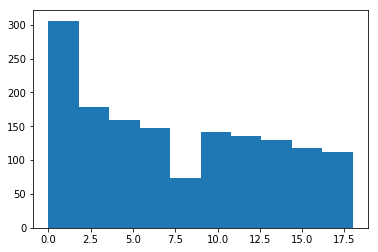

In [43]:
plt.hist( df.screen_num )

In [44]:
print( "Number of unique IP addresses : "+str( num_of_unique_ip_addresses )+" \n Number of people reaching the last screen : "+str( num_of_people_reaching_last_screen ) )

Number of unique IP addresses : 105 
 Number of people reaching the last screen : 56


In [45]:
unique_cities_hist__wo_overlap

{'Helsinki': {'count': 9},
 'Berlin': {'count': 13},
 'Gothenburg': {'count': 183},
 'Borås': {'count': 745},
 'Dalsjoefors': {'count': 16},
 'Selånger': {'count': 60},
 'Moelndal': {'count': 34},
 'Stockholm': {'count': 67},
 'Lund': {'count': 15},
 'Bramhult': {'count': 2},
 'Bollebygd': {'count': 5},
 'Nacogdoches': {'count': 4},
 'Malmo': {'count': 36},
 'Amsterdam': {'count': 20},
 'Alingsas': {'count': 62},
 'Stockholm (Stadshagen)': {'count': 23},
 'Tostared': {'count': 20},
 'Sollentuna': {'count': 23},
 'Hjo': {'count': 21},
 'Kristianstad': {'count': 3},
 'Ulricehamn': {'count': 14},
 'Sparsor': {'count': 20},
 'Skene': {'count': 20},
 'Trollhättan': {'count': 5},
 'Arnstadt': {'count': 24},
 'Limmared': {'count': 16},
 'Solna (Råsunda)': {'count': 17},
 'Ashburn': {'count': 2},
 'Lerum': {'count': 21},
 'Kalmar': {'count': 1}}

In [46]:
df.columns

Index(['epoch_time', 'ip', 'screen_num', 'time_as_string', 'ip_geoloc'], dtype='object')